Pre-Lecture HW

1.

Standard deviation is used to measure how spread out each individual data point is from a dataset's mean. A sample error of the mean (SEM) measures how accurate the sample mean is as an estimate for the population mean. It tells you how much the sample mean will vary from the population mean, after the data has been sampled multiple times.

The SEM will also always be smaller than the standard deviation (except for when the sample size is 1). As the sample size N increases, the SEM decreases. This means that as the sample size gets larger, it gives a more accurate estimate of the population mean.

2.

Steps used to create a 95% confidence interval using SEM:

- Calculate the sample mean
- Calculate the standard error of the mean
- Determine the number of SDs which cover 95% of data
    - For a normal distribution, about 1.96 SDs cover 95%
- Calculate the confidence interval

When bootstrapping and repeatedly resampling the data to get many new sample means, about 95% of the sample means should lie in the confidence interval calculated using these steps. However, if the data is not in a normal distribution, the confidence interval is likely to be less accurate.

3.

Steps to create a 95% bootstrapped confidence interval:

- Generate many bootstrapped samples. Each new sample should have the same number of data points as the original dataset.
- Calculate the sample means for each bootstrapped sample.
- Create a distribution and sort the sample means
- Determine the 2.5th and 97.5th percentile. The 95% confidence interval lies between these percentiles.

4.

In [2]:
import pandas as pd
import numpy as np

# Load the UFO dataset
url = 'https://raw.githubusercontent.com/hannahramirez/BigfootVsUfos/main/ufo_mod.csv'
# Remove any missing data
data = pd.read_csv(url)['norm_population'].dropna()

# Create 10000 bootstrapped samples with replacement using np.random.choice
# Compute the mean of each new sample with np.mean
# To calculate the confidence interval for a different parameter, all that needs to be changed is np.mean
# It can be changed to np.median, np.percentile,
boot_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(10000)]

# Calculate the 95% confidence interval with np.percentile
lower_bound, upper_bound = np.percentile(boot_means, [2.5, 97.5])

# Display the confidence interval
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")


95% Confidence Interval: [2.1043743446443969e-07, 2.1508143609279432e-07]


Chatbot summary for questions 1 - 4:

In this session, we discussed how to calculate a 95% bootstrap confidence interval for a population mean using a UFO dataset. Here's a summary of the key points covered:

Difference Between SEM and Standard Deviation: We clarified the difference between the standard error of the mean (SEM) and standard deviation, and how SEM can be used to estimate confidence intervals.

95% Bootstrapped Confidence Interval: We explored two approaches to constructing a 95% confidence interval:

Using SEM to estimate the population mean's confidence interval.
Using the percentile method to directly calculate a 95% confidence interval based on bootstrapped sample means.
Code to Calculate Bootstrap CI: You shared a dataset, and I provided a Python code that:

Loads the dataset.
Performs bootstrapping to resample the dataset.
Computes the 95% confidence interval for the population mean using the percentile method.
Simplified Code: We further simplified the bootstrapping code into a concise version and discussed each line of the code to clarify its function.

Modifying the Code for Other Parameters: Finally, I explained how to adapt the code to calculate confidence intervals for other population parameters (e.g., median, variance) by changing the function applied to the bootstrapped samples. I also provided a general template for creating confidence intervals for any statistical parameter.

https://chatgpt.com/c/66f999dd-c630-800c-b73e-e59205cec67e

5.

Population parameters are statistics that describe an entire population. These statistics are usually unknown because it is nearly impossible to collect data from an entire population with no misses or mistakes. Sample statistics are values that are collected from a sample of a population. They are used to predict what the population statistics are, and the larger the sample, the more accurate it is.

A confidence interval is a range of values in which a population statistic is expected to fall in. It is important to distinguish the difference between a population and sample statistic when calculating a confidence interval, because the sample statistic is used in the calculation to find the confidence interval which will predict the population statistic.

Chatbot Summary:

In this session, we discussed the importance of distinguishing between population parameters and sample statistics when constructing confidence intervals. Population parameters are unknown values that describe the entire population, while sample statistics are calculated from a sample and used to estimate those parameters. The confidence interval provides a range in which the population parameter is likely to fall, based on the sample statistic. Recognizing the difference is essential for interpreting confidence intervals correctly, as the sample statistic is known and varies, while the population parameter is fixed but unknown.

https://chatgpt.com/c/66faa77b-942c-800c-bf15-2d113d44a403

6.1

Bootstrapping is the process of repeatedly resampling a dataset so we can better understand and interpret the dataset. In the process of bootstrapping, one sample of data is sampled again multiple times with replacement. This means that with the same sample size, some data points can be picked multiple times or no times at all in a new resample. After many resamples, we now have new statistics that can be helpful for us to predict what larger sample sizes, such as populations, could return.

6.2

The main purpose of bootstrapping is to predict what data would look like with a population, when our sample size is much smaller. By resampling the data we already have, bootstrapping will give a better sense of our sample's accuracy and what the data could look like with a larger sample. It helps us further understand our data so that we can know what a larger dataset could look like.

6.3

To accurately predict a population average, bootstrapping is a useful technique to use. The first step would be to calculate the average for the sample you already have. Next is to reteadly resample the data with replacement, but with the same sample size each time. After the data has been resampled enough times, it is now time to calculate the average for each resample, and then calculate the average of all resampled averages. Then, it is important to calculate a confidence interval, which represents the likelyhood of where the population average would lie. Finally, you can check to see if your hypothesized average falls in the range of the calculated confidence interval. If it does, then you made a good hypothesis.

7.

Confidence interval overlapping 0: When a confidence interval includes 0, it means it is possible for the average to be 0. Even if the average of the data is not 0, since 0 is included in the interval, it means that there is uncertainty. Because 0 is possible as an average, it is impossible to determine for sure that the data is being effected by whatever is being observed.

Confidence interval not overlapping 0: When 0 is not included in the confidence interval, it means that it is impossible for the average to be 0. This means that the data is being effected by whatever is being observed.

8.

Problem Introduction:

In this context, the null hypothesis shows that there is no significant difference in health between patients before and after they took the vaccine. Any change in health is due to random occurences rather than the vaccine itself.

/tmp/ipykernel_52/3986385469.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HealthScoreType', y='HealthScore', data=data_melted, palette="Set2")


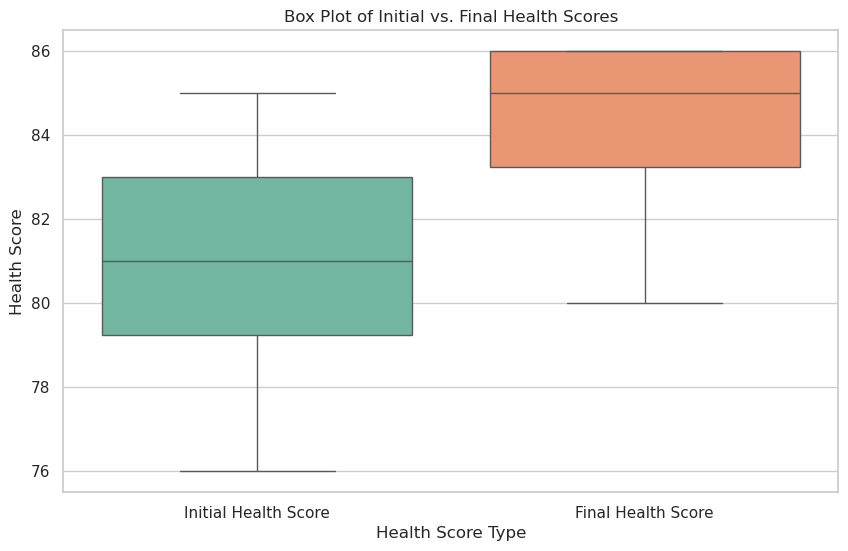

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directly define the data
data_dict = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
data = pd.DataFrame(data_dict)

# Melt the data for easier plotting
data_melted = data.melt(id_vars=['PatientID', 'Age', 'Gender'], 
                         value_vars=['InitialHealthScore', 'FinalHealthScore'],
                         var_name='HealthScoreType', value_name='HealthScore')

# Set the style of the plots
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HealthScoreType', y='HealthScore', data=data_melted, palette="Set2")
plt.title('Box Plot of Initial vs. Final Health Scores')
plt.xlabel('Health Score Type')
plt.ylabel('Health Score')
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])  # Rename x-ticks
plt.show()



Here is a visualization of the health scores for all patients before and after they took the vaccine.

Quantitative analysis:

Mean Initial Health Score: 81.0

Mean Final Health Score: 84.3

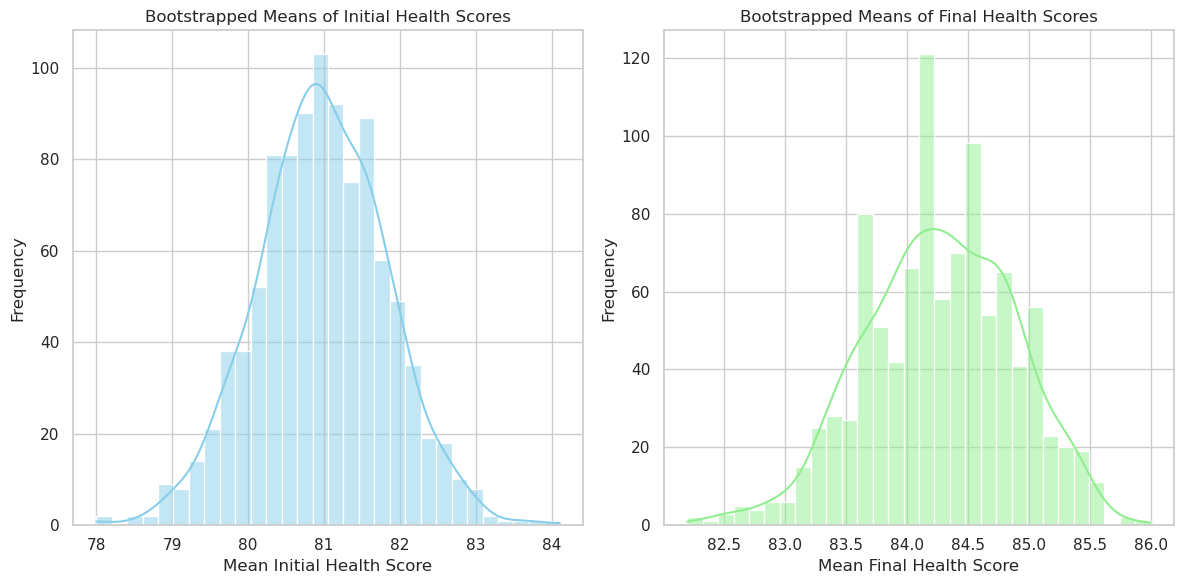

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Directly define the data
data_dict = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
data = pd.DataFrame(data_dict)

# Bootstrapping function
def bootstrap_means(data, column, num_samples=1000):
    """Generate bootstrapped means for a specified column."""
    means = []
    for _ in range(num_samples):
        sample = data[column].sample(frac=1, replace=True)  # Sampling with replacement
        means.append(sample.mean())
    return means

# Bootstrapping for Initial and Final Health Scores
bootstrapped_initial_means = bootstrap_means(data, 'InitialHealthScore')
bootstrapped_final_means = bootstrap_means(data, 'FinalHealthScore')

# Set the style of the plots
sns.set(style="whitegrid")

# Create histograms for bootstrapped means
plt.figure(figsize=(12, 6))

# Histogram for Bootstrapped Initial Health Scores
plt.subplot(1, 2, 1)
sns.histplot(bootstrapped_initial_means, bins=30, color='skyblue', kde=True)
plt.title('Bootstrapped Means of Initial Health Scores')
plt.xlabel('Mean Initial Health Score')
plt.ylabel('Frequency')

# Histogram for Bootstrapped Final Health Scores
plt.subplot(1, 2, 2)
sns.histplot(bootstrapped_final_means, bins=30, color='lightgreen', kde=True)
plt.title('Bootstrapped Means of Final Health Scores')
plt.xlabel('Mean Final Health Score')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


These are distributions of bootstrapped means of the original sample.

Mean Bootstrapped Initial Health Score: 81.018

Mean Bootstrapped Final Health Score: 84.3103

After seeing the original sample and the bootstrapped one, I think it is fair to say that the null hypothesis of no effect is not true for this dataset. It is quite clear by a large margin that the average patient had a higher health score after taking the vaccine than before. The maximum health score increased by 2.0, and the minimum health score increased by more than 4.0. It is obvious that the vaccine does have an effect on patients who take it.

Chat bot summary:

Here's a summary of our chatbot session:

Null Hypothesis Explanation: We discussed the meaning of the null hypothesis of "no effect" in the context of analyzing the effectiveness of a vaccine.

Data Visualization:

I provided code to create a box plot to visualize the initial and final health scores of patients after vaccination.
You encountered a warning about the legend, which I resolved by removing it.
You requested an adjustment to the y-axis to better see the final quartile of the box plot, which I implemented.
Mean Calculation:

I calculated the means for the initial and final health scores, resulting in a mean of 81.0 for initial health scores and 84.3 for final health scores.
Bootstrapping Analysis:

I created a bootstrapping method to generate distributions of means for the initial and final health scores.
We visualized these distributions using histograms.
Bootstrapped Mean Calculation:

I calculated the means of the bootstrapped distributions, yielding a mean bootstrapped initial health score of 81.018 and a mean bootstrapped final health score of 84.3103.

https://chatgpt.com/c/66fb3332-af2c-800c-9a98-8157864efc2b